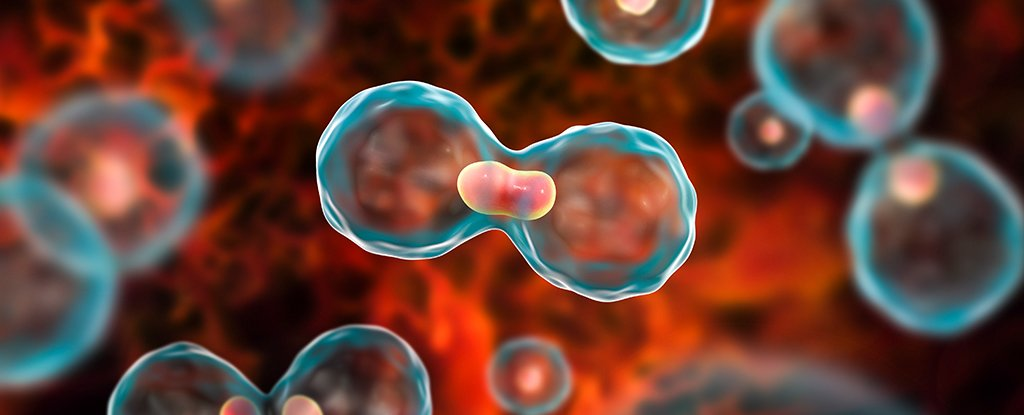

In [1]:
#Import Library
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read dataset
cancer_df = pd.read_csv('Cancer_Dataset.csv')

**Features**

-Age: Integer values representing the patient's age, ranging from 20 to 80.

-Gender: Binary values representing gender, where 0 indicates Male and 1 indicates Female.

-BMI: Continuous values representing Body Mass Index, ranging from 15 to 40.

-Smoking: Binary values indicating smoking status, where 0 means No and 1 means Yes.

-GeneticRisk: Categorical values representing genetic risk levels for cancer, with 0 indicating Low, 1 indicating Medium, and 2 indicating High.

-PhysicalActivity: Continuous values representing the number of hours per week spent on physical activities, ranging from 0 to 10.

-AlcoholIntake: Continuous values representing the number of alcohol units consumed per week, ranging from 0 to 5.

-CancerHistory: Binary values indicating whether the patient has a personal history of cancer, where 0 means No and 1 means Yes.

-Diagnosis: Binary values indicating the cancer diagnosis status, where 0 indicates No Cancer and 1 indicates Cancer.

**Target Variable**

**Diagnosis:** The main variable to predict, indicating if a patient has cancer.

In [3]:
cancer_df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [4]:
cancer_df.columns

Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Diagnosis'],
      dtype='object')

In [5]:
print('Data Dimension : {}'.format(cancer_df.shape))

Data Dimension : (1500, 9)


In [6]:
#Checking null values
cancer_df.isnull().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

Diagnosis
0    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
1    [[Axes(0.125,0.666111;0.215278x0.213889), Axes...
dtype: object

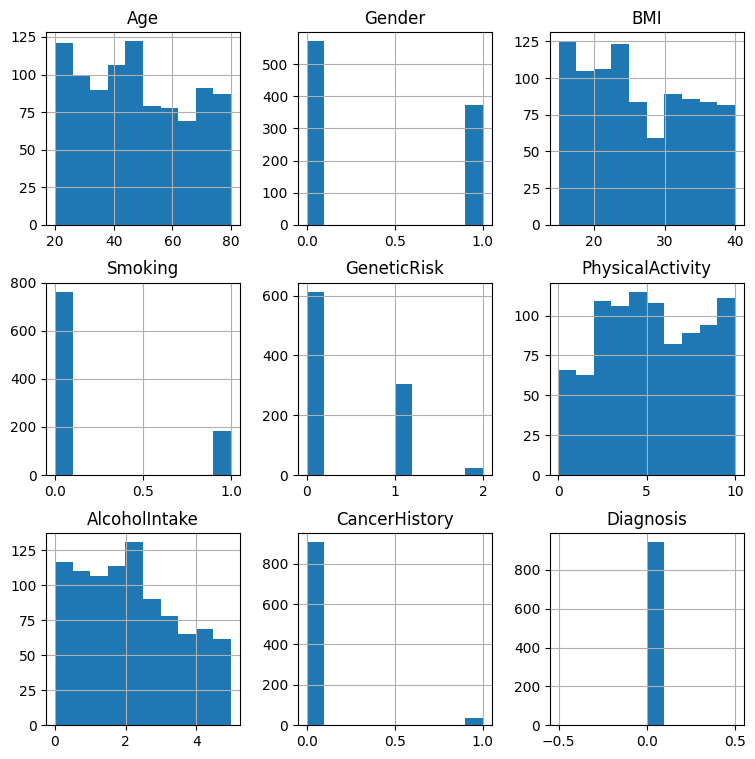

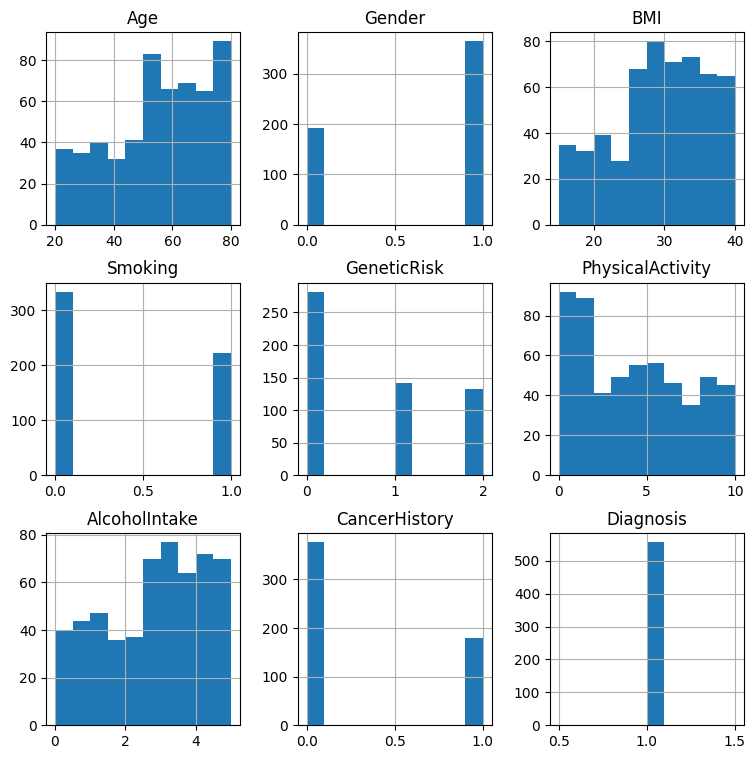

In [7]:
#Displays data per factor based on Diagnosis classification
cancer_df.groupby('Diagnosis').hist(figsize=(9,9))

In [8]:
#Split the data
factor = ['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory']

X = cancer_df[factor]
y = cancer_df.Diagnosis

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=cancer_df.Diagnosis, random_state=0)

In [11]:
LR = LogisticRegression()

In [12]:
X_test.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
456,65,1,21.798743,1,1,0.847662,2.842361,0
1349,72,1,22.061811,0,0,8.950339,2.892927,0
135,70,0,35.562014,0,0,9.701169,2.412118,0
512,39,0,16.556828,0,2,2.401516,3.158874,0
936,28,1,26.566890,1,1,8.425345,3.602932,1


In [13]:
LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
y_test.head()

456     1
1349    0
135     0
512     0
936     1
Name: Diagnosis, dtype: int64

In [15]:
LR.predict(X_test.head())

array([1, 0, 0, 0, 1])

In [16]:
LR.score(X_test, y_test)

0.8853333333333333

# Cancer Prediction Program

In [17]:
cancer_df.columns

Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Diagnosis'],
      dtype='object')

In [19]:
#Cancer Prediction Program
data_age = int(input("Enter the Age : "))
data_Gender = int(input("Input Gender (0/1) [0:Male, 1:Female] : "))
data_bmi = float(input("Input BMI : "))
data_smoking = int(input("Input Smoking Status [0:No, 1:Yes] : "))
data_gen = int(input("Input Genetic Risk [0:Low, 1:Medium, 2:High] : "))
data_phy = float(input("Number of hours per week spent on physical activities, ranging from 0 to 10 : "))
data_alc = float(input("Number of alcohol units consumed per week, ranging from 0 to 5 : "))
data_hist = int(input("Cancer History (0 means No and 1 means Yes) : "))

data = [[data_age, data_Gender, data_bmi, data_smoking, data_gen, data_phy, data_alc, data_hist]]

predict = LR.predict(data)
if predict == [0]:
  print("=======================")
  print("\nYou don't have cancer")
else:
  print("=================")
  print("\nYou have cancer")

Enter the Age : 28
Input Gender (0/1) [0:Male, 1:Female] : 1
Input BMI : 27
Input Smoking Status [0:No, 1:Yes] : 1
Input Genetic Risk [0:Low, 1:Medium, 2:High] : 1
Number of hours per week spent on physical activities, ranging from 0 to 10 : 9
Number of alcohol units consumed per week, ranging from 0 to 5 : 4
Cancer History (0 means No and 1 means Yes) : 1

You have cancer


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
